In [1]:
from sympy import *
import numpy as np
from IPython.display import display
init_printing()

### Khai báo biến

"Biến" ở đây có nghĩa là "biến số" trong toán học chứ không phải một vùng nhớ lưu trữ dữ liệu thông thường. Giả sử ta chọn $x,y,z$ làm biến.

In [2]:
x = Symbol('x')
# hoặc cách khác
y, z = symbols('y, z')

In [3]:
print(type(x))
print(type(y))

<class 'sympy.core.symbol.Symbol'>
<class 'sympy.core.symbol.Symbol'>


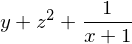

In [4]:
1/(x+1)+y+z**2

### Các kiểu số

In [5]:
c = 20 + 17*I # Số phức
r = Rational(20,17) # Số hữu tỷ
display(r)
# hoặc đơn giản là
r

### Ước lượng giá trị

Dùng method `eval` hoặc hàm `N`.

In [6]:
pi.evalf(30)

In [7]:
N((x+pi)**2, 3)

### Thế giá trị của biến vào biểu thức

Giả sử cần tính giá trị của $\frac{1}{x+1}+y+z^2$ với $x=0, y=1, z=3$. Mỗi biểu thức trong `sympy` đều có method `subs` nhận một array gồm các tuples. Mỗi tuple là một cặp theo thứ tự biến số và giá trị thay vào biến.

In [8]:
(1/(x+1)+y+z**2).subs([(x, 0), (y, 1), (z, 3)])

Giả sử cần tính giá trị của $x+2y^3$ với $x=\pi^3, y=\pi+1$. Kết quả lấy chính xác đến 15 chữ số.

In [9]:
expression = x + 2*y**3
result = expression.subs([(x, pi**3), (y, pi+1)]) 
display(result)
print(N(result, 15))

173.086012368974


Để tối ưu tính toán giá trị số của biểu thức trong `sympy`, thay vì dùng method `subs` để thay giá trị vào biến có thể định nghĩa một hàm hoặc `lambdify` biểu thức đó. Giả sử cần gọi hàm $f(x)=x^2$ rất nhiều lần (để vẽ đồ thị chẳng hạn).

In [10]:
f = x**2
f

In [11]:
def f1(x):
    return x**2
f2 = lambdify([x], f)
arr_x = np.linspace(0, 10, 50)

In [12]:
%%timeit
arr_f = np.array([N(f.subs(x, xx)) for xx in arr_x])

6.58 ms ± 1.02 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit
arr_f1 = f1(arr_x)

1.46 µs ± 32.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [14]:
%%timeit
arr_f2 = f2(arr_x)

1.55 µs ± 54.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Lưu ý: Với cách định nghĩa và sử dụng `f1`, bạn gần hoàn toàn không hề sử dụng đến thư viện `sympy` mà chỉ dùng `numpy` thuần túy.

### Biến đổi biểu thức đại số

#### Khai triển và tách nhân tử

In [15]:
expand((x+1)**2*(y+2))

In [16]:
factor(x**2*y+2*x**2+2*x*y+4*x+y+2)

In [17]:
expand((sin(x+y)+1)**2*(sin(x*y)+2))

Để khai triển các hàm lượng giác (trigonometry) ra hẳn thì thêm tham số `trig=True`.

In [18]:
expand((sin(x+y)+1)**2*(sin(x*y)+2), trig=True)

Sau đây là thông tin thêm về hàm `expand`:

In [19]:
help(expand)

Help on function expand in module sympy.core.function:

expand(e, deep=True, modulus=None, power_base=True, power_exp=True, mul=True, log=True, multinomial=True, basic=True, **hints)
    Expand an expression using methods given as hints.
    
    Hints evaluated unless explicitly set to False are:  ``basic``, ``log``,
    ``multinomial``, ``mul``, ``power_base``, and ``power_exp`` The following
    hints are supported but not applied unless set to True:  ``complex``,
    ``func``, and ``trig``.  In addition, the following meta-hints are
    supported by some or all of the other hints:  ``frac``, ``numer``,
    ``denom``, ``modulus``, and ``force``.  ``deep`` is supported by all
    hints.  Additionally, subclasses of Expr may define their own hints or
    meta-hints.
    
    The ``basic`` hint is used for any special rewriting of an object that
    should be done automatically (along with the other hints like ``mul``)
    when expand is called. This is a catch-all hint to handle any s

#### Rút gọn biểu thức

In [20]:
simplify(2**x*3**x*2**y)

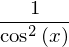

In [21]:
simplify(1+tan(x)**2)

Đọc thêm về `simplify` tại: http://docs.sympy.org/latest/tutorial/simplification.html

#### `apart` và `together`

Kỹ thuật tách phân thức ra tổng hai phân thức hoặc cộng hai phân thức thường được dùng trong tính tích phân hoặc nguyên hàm.

Ví dụ, tính tích phân:
$$I = \int\frac{-17x-37}{(x+3)(3x+7)}dx$$

In [22]:
f = (-17*x-37)/((x+3)*(3*x+7))

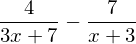

In [23]:
apart(f)

$$I = \int\left(\frac{4}{3x+7} - \frac{7}{x+3}\right)dx = \frac{4\ln\bigl| x+\frac{7}{3} \bigr|}{3} - 7\ln\bigl|x+3\bigr|$$

Ngược lại với `apart`:

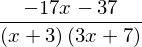

In [24]:
together(4/(3*x+7) - 7/(x+3))

Trong `sympy`, Python, và nhiều ngôn ngữ lập trình khác, $\log$ được ngầm hiểu là logarithm cơ số tự nhiên ($\ln$). Khác với toán học là cơ số 10.

### Tích phân

#### Nguyên hàm

Thay vì tính toán dài dòng như trên, có thể nhờ `sympy` tính hộ thông qua hàm `integrate`.

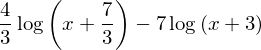

In [25]:
F = integrate(f, x)
F

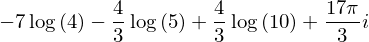

In [26]:
integrate(f, (x, -4, 1))

Tích phân có thể là hạn định hoặc không hạn định.

In [27]:
integrate(-1/x**2, x)

In [28]:
integrate(-1/x**2, (x, 1, oo))

#### Đạo hàm

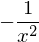

In [29]:
diff(1/x, x, 1) # Đạo hàm cấp 1

In [30]:
diff(1/x, x, 2) # Đạo hàm cấp 2

Tính $\frac{d^3f}{dxdy^2}$:

In [31]:
diff(sin(x)+cos(x+y), x, 1, y, 2)

#### Giới hạn

Tính: $\lim_{x\rightarrow 0}\frac{1}{x}$

In [32]:
limit(1/x, x, 0)

### Tổng và tích

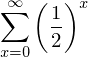

In [33]:
s = Sum(Rational(1,2)**x, (x, 0, oo))
s

In [34]:
s.evalf()

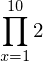

In [35]:
p = Product(2, (x, 1, 10))
p

In [36]:
N(p)

### Giải phương trình và hệ phương trình

Ví dụ, giải phương trình $x^4 - 16 = 0$ theo biến $x$ ($y$ là tham số):

In [37]:
solve(x**4-y, x)

Ví dụ, giải hệ phương trình sau theo biến $x,y$:
\begin{align}
x+xy & = 0 \\
x-y^2 & = 0 \\
\end{align}

In [38]:
solve([x+x*y, x-y**2], [x,y])